# <center>MAJOR ASSIGNMENT 3</center>

## Task-1: Data Preprocessing

In [21]:
print('''Name: Sidhanta Barik, RegNo: 2241002049
-------------------------------------------------------''')

import tensorflow as tf
import numpy as np

from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images_flat = train_images.reshape(len(train_images), -1)
test_images_flat = test_images.reshape(len(test_images), -1)

assert not np.isnan(train_images_flat).any(), "Missing values in training images!"
assert not np.isnan(test_images_flat).any(), "Missing values in test images!"
assert not np.isnan(train_labels).any(), "Missing values in training labels!"
assert not np.isnan(test_labels).any(), "Missing values in test labels!"

print("Preprocessing complete. Ready for training.")


Name: Sidhanta Barik, RegNo: 2241002049
-------------------------------------------------------
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Preprocessing complete. Ready for training.


_________________
## Task-2: K-Nearest Neighbors (KNN) Classification

In [22]:
print('''Name: Sidhanta Barik, RegNo: 2241002049
-------------------------------------------------------''')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Reduced dimensions from 784 to 100 for faster training
pca = PCA(n_components=100)
train_pca = pca.fit_transform(train_images_flat)
test_pca = pca.transform(test_images_flat)

def evaluate_knn(k):
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto', n_jobs=-1)
    knn.fit(train_pca[:10000], train_labels[:10000])  # Use 10k samples to reduce runtime
    predictions = knn.predict(test_pca[:2000])
    accuracy = accuracy_score(test_labels[:2000], predictions)
    print(f"KNN (k={k}) Accuracy: {accuracy:.4f}")
    return accuracy

for k in [3, 5, 7]:
    evaluate_knn(k)


Name: Sidhanta Barik, RegNo: 2241002049
-------------------------------------------------------
KNN (k=3) Accuracy: 0.8160
KNN (k=5) Accuracy: 0.8320
KNN (k=7) Accuracy: 0.8300


_________________
## Task-3: Support Vector Machine (SVM) Classification

In [23]:
print('''Name: Sidhanta Barik, RegNo: 2241002049
-------------------------------------------------------''')

from sklearn.svm import SVC

def evaluate_svm(kernel_type):
    svm = SVC(kernel=kernel_type, C=1.0)
    svm.fit(train_pca[:10000], train_labels[:10000])
    predictions = svm.predict(test_pca[:2000])
    accuracy = accuracy_score(test_labels[:2000], predictions)
    print(f"SVM ({kernel_type} kernel) Accuracy: {accuracy:.4f}")
    return accuracy

for kernel in ['linear', 'poly', 'rbf']:
    evaluate_svm(kernel)


Name: Sidhanta Barik, RegNo: 2241002049
-------------------------------------------------------
SVM (linear kernel) Accuracy: 0.8430
SVM (poly kernel) Accuracy: 0.8430
SVM (rbf kernel) Accuracy: 0.8600


_________________
## Task-4: Data Visualization with t-SNE

Name: Sidhanta Barik, RegNo: 2241002049
-------------------------------------------------------


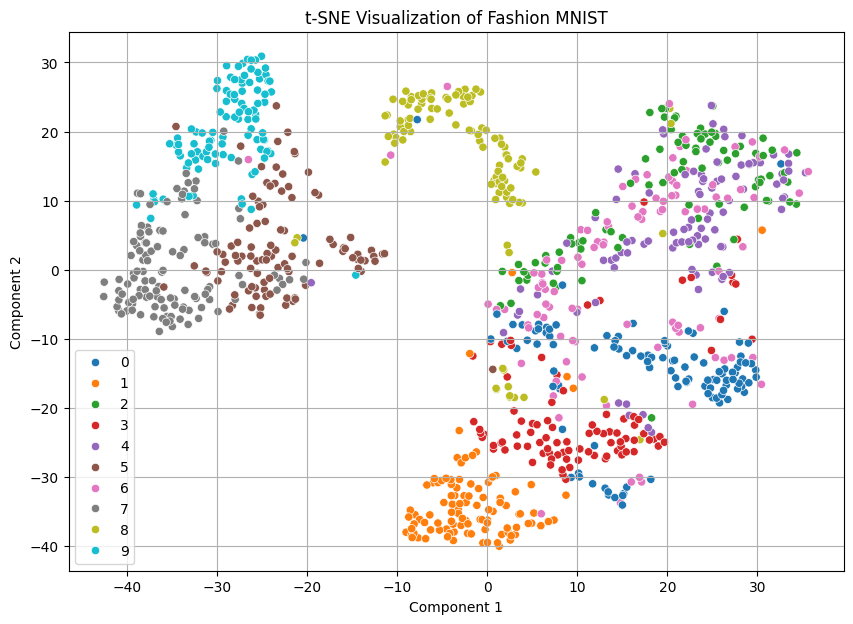

In [24]:
print('''Name: Sidhanta Barik, RegNo: 2241002049
-------------------------------------------------------''')

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

sample_data = train_images_flat[:1000]
sample_labels = train_labels[:1000]

pca_for_tsne = PCA(n_components=50).fit_transform(sample_data)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(pca_for_tsne)

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=sample_labels, palette='tab10', legend='full')
plt.title("t-SNE Visualization of Fashion MNIST")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


_________________
## Task-5: Model Evaluation and Reporting

In [25]:
print('''Name: Sidhanta Barik, RegNo: 2241002049
-------------------------------------------------------''')

from sklearn.metrics import classification_report, confusion_matrix

best_knn = KNeighborsClassifier(n_neighbors=5)
best_knn.fit(train_pca[:10000], train_labels[:10000])
knn_preds = best_knn.predict(test_pca[:2000])

best_svm = SVC(kernel='rbf', C=1.0)
best_svm.fit(train_pca[:10000], train_labels[:10000])
svm_preds = best_svm.predict(test_pca[:2000])

print("\nKNN Evaluation Report (k=5):")
print(classification_report(test_labels[:2000], knn_preds))
print("Confusion Matrix:\n", confusion_matrix(test_labels[:2000], knn_preds))

print("\nSVM Evaluation Report (rbf kernel):")
print(classification_report(test_labels[:2000], svm_preds))
print("Confusion Matrix:\n", confusion_matrix(test_labels[:2000], svm_preds))


Name: Sidhanta Barik, RegNo: 2241002049
-------------------------------------------------------

KNN Evaluation Report (k=5):
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       200
           1       0.99      0.95      0.97       203
           2       0.75      0.76      0.75       214
           3       0.85      0.87      0.86       190
           4       0.77      0.75      0.76       219
           5       0.96      0.82      0.88       195
           6       0.58      0.59      0.59       197
           7       0.85      0.93      0.89       200
           8       0.97      0.94      0.96       194
           9       0.87      0.94      0.90       188

    accuracy                           0.83      2000
   macro avg       0.84      0.83      0.83      2000
weighted avg       0.84      0.83      0.83      2000

Confusion Matrix:
 [[163   0   2   7   1   0  27   0   0   0]
 [  3 192   0   6   1   0   1   0   0   0]
 [  5   0 